<a href="https://colab.research.google.com/github/nattntn/7-14yrs_EffNet/blob/main/Transfer_with_Gender/Test/7_14_08_Eff_Classify_Predict_250Freeze_Unflipped.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##เรียกใช้ CSV

In [ ]:
#เชื่อม google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Import

In [ ]:
import os
import numpy as np
import pandas as pd
#import efficientnet.tfkeras
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0

# Clone Efficient

In [ ]:
#ดึงข้อมูลใน Github มาใช้
import os
%cd /content
if not os.path.isdir("efficientnet_keras_transfer_learning"):
 !git clone https://github.com/Wanita-8943/efficientnet_keras_transfer_learning
%cd efficientnet_keras_transfer_learning/


/content
Cloning into 'efficientnet_keras_transfer_learning'...
remote: Enumerating objects: 1100, done.
remote: Counting objects: 100% (263/263), done.
remote: Compressing objects: 100% (142/142), done.
remote: Total 1100 (delta 133), reused 241 (delta 121), pack-reused 837
Receiving objects: 100% (1100/1100), 14.10 MiB | 23.40 MiB/s, done.
Resolving deltas: 100% (630/630), done.
/content/efficientnet_keras_transfer_learning


# Load Model

In [ ]:
import sys
sys.path.append('/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Model/Unflipped_Classification_Gender(7-14)/8_Class_1e-4_250_Freeze.h5')

from efficientnet.layers import Swish, DropConnect
from efficientnet.model import ConvKernalInitializer
from tensorflow.keras.utils import get_custom_objects

get_custom_objects().update({
    'ConvKernalInitializer': ConvKernalInitializer,
    'Swish': Swish,
    'DropConnect':DropConnect
})


In [ ]:
from tensorflow.keras.models import load_model
model = tf.keras.models.load_model("/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Model/Unflipped_Classification_Gender(7-14)/8_Class_1e-4_250_Freeze.h5")
model.summary()

Model: "EffNet_Classification"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 112, 112, 32)         128       ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 swish (Swish)               (None, 112, 112, 32)         0         ['batch_no

In [ ]:
height = width = model.input_shape[1]
print(f"height: {height}, width: {width}")

height: 224, width: 224


# Data Preparation

In [ ]:
train = pd.read_csv (r'/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Model/Unflipped_Classification_Gender(7-14)/table_train_ForGender_7_14_fold.csv')
train

,Unnamed: 0,Age(year),Gender,Folder_type,Folder_name,Path_Name,Filename,Fold,Gender_Class
0,0,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V1.jpg,2,0
1,1,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV1.jpg,4,0
2,2,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V2.jpg,10,0
3,3,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV2.jpg,9,0
4,4,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V3.jpg,10,0
...,...,...,...,...,...,...,...,...,...
1828,1828,14,M,Normal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,YY69.jpg,6,1
1829,1829,14,M,Normal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,Y231.jpg,9,1
1830,1830,14,M,Normal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,Y286.jpg,1,1
1831,1831,14,M,Normal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,Y309.jpg,3,1


In [ ]:
train = train.iloc[:,1:]

In [ ]:
DATA_PATH = "/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images"
os.chdir(DATA_PATH)
train_dir = os.path.join(DATA_PATH, 'Normal')
print(train_dir)
test_dir = os.path.join(DATA_PATH, 'Test')
print(test_dir)

/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Normal
/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test


In [ ]:
batch_size = 16

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255, #โมเดลส่วนใหญ่ต้องใช้ RGB ในช่วง 0–1
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      # horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
        dataframe = train,
        directory = DATA_PATH,
        x_col = 'Path_Name',
        y_col = 'Gender_Class',
        class_mode = 'raw',
        color_mode= 'rgb',
        target_size=(height, width),# รูปภาพทั้งหมดจะถูกปรับขนาดตามความสูงและความกว้างของเป้าหมาย
        batch_size=batch_size)
#label
#labels = (train_generator.class_indices)
#labels = dict((v,k) for k,v in labels.items())
#print(labels)

Found 1833 validated image filenames.


In [ ]:
test = pd.read_csv (r'/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Model/Unflipped_Regress_Age(7-14)/Duo/table_test_7_14_forGender.csv')
test

,Unnamed: 0,Age(year),Gender,Folder_type,Folder_name,Path_Name,Filename,Gender_Class,Gender_Predict
0,0,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V69.jpg,0,Female
1,1,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV69.jpg,0,Female
2,2,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V70.jpg,0,Female
3,3,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV70.jpg,0,Female
4,4,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V74.jpg,0,Female
...,...,...,...,...,...,...,...,...,...
387,920,12,M,Abnormal,Lt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipOO101.jpg,1,Male
388,921,12,M,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,OO98.jpg,1,Male
389,922,14,F,Abnormal,Lt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipY95.jpg,0,Female
390,923,14,F,Abnormal,Lt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipY187.jpg,0,Female


In [ ]:
test = test.iloc[:,1:]
test

,Age(year),Gender,Folder_type,Folder_name,Path_Name,Filename,Gender_Class,Gender_Predict
0,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V69.jpg,0,Female
1,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV69.jpg,0,Female
2,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V70.jpg,0,Female
3,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV70.jpg,0,Female
4,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V74.jpg,0,Female
...,...,...,...,...,...,...,...,...
387,12,M,Abnormal,Lt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipOO101.jpg,1,Male
388,12,M,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,OO98.jpg,1,Male
389,14,F,Abnormal,Lt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipY95.jpg,0,Female
390,14,F,Abnormal,Lt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipY187.jpg,0,Female


# Predict

In [ ]:
act_int = test['Gender_Class'].tolist() #ค่าจริง
path = test['Path_Name'].tolist() #path

In [ ]:
from tensorflow.keras.preprocessing import image

def predict_image(img_path):
    # Read the image and resize it
    img = image.load_img(img_path, target_size=(height, width)) #รูปทุกรูปมีขนาดไม่เท่ากันจึงตั้งไว้ว่าเวลาจะให้ model ดึงรูปมาทำนายให้ดึงรูปเข้ามาตามขนาดที่ตั้งไว้ตามพารามิตเตอร์
    # Convert it to a Numpy array with target shape.
    x = image.img_to_array(img)  #model ไม่สามารถทำนายรูปภาพโดยตรงได้ จึงเเปลงรูปภาพให้เป็น array เเล้วให้โมเดลทำนาย
    # Reshape
    x = x.reshape((1,) + x.shape) # เพิ่ม ไดเมนชั่นของโมเดล ให้เป็น 4 ได้ เมนชั่น โดยที่ 1, คือบอกให้โมเดลนำเข้าทีละ 1 รูปเเล้วค่อยทำนาย เเละ + ไดเมนชั่น คือ 150 ,150 ,3(สีของ RGB)
    x /= 255.
    result = model.predict([x])
    return result[0]

In [ ]:
predict_image(path[0])[0]

1/1 [==============================] - 4s 4s/step


0.8377686

In [ ]:
#Predict
pred_list = list()
prob_list = list()
img_path= path
for i in range(0,len(img_path)):
    predict = predict_image(img_path[i])
    result = predict[0]
    re_prop = np.argmax(predict)
    pred_list.append(result)
    prob_list.append(predict[re_prop])

1/1 [==============================] - 0s 25ms/step


In [ ]:
pred_list

[0.8377686,
 0.074573115,
 0.77629226,
 0.10423173,
 0.8868112,
 0.03103595,
 0.11244513,
 0.12068028,
 0.5342539,
 0.027983392,
 0.048402805,
 0.30627927,
 0.008484677,
 0.044733092,
 0.13818316,
 0.01592975,
 0.31556806,
 0.49612862,
 0.21841061,
 0.2654791,
 0.7721119,
 0.1845858,
 0.15180966,
 0.02577845,
 0.79978186,
 0.17277423,
 0.021105036,
 0.8870362,
 0.46270537,
 0.27473602,
 0.447918,
 0.5072472,
 0.044238377,
 0.18781434,
 0.08633168,
 0.48462132,
 0.033927567,
 0.03896551,
 0.0728709,
 0.33366865,
 0.53502876,
 0.005207725,
 0.31401807,
 0.10854732,
 0.8845156,
 0.94672954,
 0.99059266,
 0.10164436,
 0.1909352,
 0.36829725,
 0.0023315428,
 0.40951583,
 0.12237562,
 0.48564032,
 0.038627233,
 0.02724261,
 0.17336063,
 0.37445745,
 0.67379797,
 0.054876037,
 0.012669983,
 0.29908174,
 0.17171043,
 0.12297438,
 0.63899404,
 0.1517154,
 0.061400745,
 0.01607349,
 0.0046997503,
 0.9077425,
 0.61858594,
 0.014910747,
 0.08617385,
 0.22555631,
 0.31132418,
 0.020909738,
 0.01507

In [ ]:
print(type(pred_list))

<class 'list'>


In [ ]:
list_pred = []
# ใช้ลูป for เพื่อแปลงค่าและเพิ่มเข้าใน NumPy array
for value in pred_list:
    if value >= 0.5:
        list_pred = np.append(list_pred, 'Male')
    else:
        list_pred = np.append(list_pred, 'Female')

# แสดงผลลัพธ์
print(list_pred)

['Male' 'Female' 'Male' 'Female' 'Male' 'Female' 'Female' 'Female' 'Male'
 'Female' 'Female' 'Female' 'Female' 'Female' 'Female' 'Female' 'Female'
 'Female' 'Female' 'Female' 'Male' 'Female' 'Female' 'Female' 'Male'
 'Female' 'Female' 'Male' 'Female' 'Female' 'Female' 'Male' 'Female'
 'Female' 'Female' 'Female' 'Female' 'Female' 'Female' 'Female' 'Male'
 'Female' 'Female' 'Female' 'Male' 'Male' 'Male' 'Female' 'Female'
 'Female' 'Female' 'Female' 'Female' 'Female' 'Female' 'Female' 'Female'
 'Female' 'Male' 'Female' 'Female' 'Female' 'Female' 'Female' 'Male'
 'Female' 'Female' 'Female' 'Female' 'Male' 'Male' 'Female' 'Female'
 'Female' 'Female' 'Female' 'Female' 'Male' 'Male' 'Female' 'Female'
 'Female' 'Female' 'Female' 'Female' 'Female' 'Female' 'Male' 'Male'
 'Male' 'Male' 'Male' 'Male' 'Male' 'Female' 'Female' 'Female' 'Female'
 'Female' 'Male' 'Female' 'Female' 'Female' 'Female' 'Female' 'Female'
 'Female' 'Female' 'Female' 'Female' 'Male' 'Female' 'Female' 'Female'
 'Female' 'Fem

In [ ]:
test['Predict_float'] = pred_list
test['Predict_str'] = list_pred
# แสดง DataFrame
test

,Age(year),Gender,Folder_type,Folder_name,Path_Name,Filename,Gender_Class,Gender_Predict,Predict_float,Predict_str
0,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V69.jpg,0,Female,0.837769,Male
1,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV69.jpg,0,Female,0.074573,Female
2,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V70.jpg,0,Female,0.776292,Male
3,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV70.jpg,0,Female,0.104232,Female
4,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V74.jpg,0,Female,0.886811,Male
...,...,...,...,...,...,...,...,...,...,...
387,12,M,Abnormal,Lt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipOO101.jpg,1,Male,0.198933,Female
388,12,M,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,OO98.jpg,1,Male,0.100131,Female
389,14,F,Abnormal,Lt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipY95.jpg,0,Female,0.658422,Male
390,14,F,Abnormal,Lt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipY187.jpg,0,Female,0.995352,Male


In [ ]:
#test.to_csv('/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Model/EfficientNet_Class_Func_224/Table_test_Predict_Gender224.csv')

In [ ]:
# test = pd.read_csv('/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Model/EfficientNet_Class_Func_224/Table_test_Predict_Gender224.csv')

In [ ]:
test

,Age(year),Gender,Folder_type,Folder_name,Path_Name,Filename,Gender_Class,Gender_Predict,Predict_float,Predict_str
0,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V69.jpg,0,Female,0.837769,Male
1,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV69.jpg,0,Female,0.074573,Female
2,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V70.jpg,0,Female,0.776292,Male
3,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV70.jpg,0,Female,0.104232,Female
4,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V74.jpg,0,Female,0.886811,Male
...,...,...,...,...,...,...,...,...,...,...
387,12,M,Abnormal,Lt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipOO101.jpg,1,Male,0.198933,Female
388,12,M,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,OO98.jpg,1,Male,0.100131,Female
389,14,F,Abnormal,Lt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipY95.jpg,0,Female,0.658422,Male
390,14,F,Abnormal,Lt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipY187.jpg,0,Female,0.995352,Male


# Evaluate All

In [ ]:
pred_str = np.array(list_pred) #แปลงเป็น array
act_str = np.array(test['Gender_Predict'].tolist())

pred_int = np.array(pred_list) #แปลงเป็น array
act_int = test['Gender_Class'].tolist() #ค่าจริง

## confusion_matrix

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

# act = data_train['class'].array
# pred = data_train['category_ov'].array

cmat = confusion_matrix(act_str, pred_str)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act_str, pred_str))#performance

classifier accuracy = 64.28571428571429%
              precision    recall  f1-score   support

      Female       0.63      0.71      0.67       199
        Male       0.66      0.57      0.61       193

    accuracy                           0.64       392
   macro avg       0.64      0.64      0.64       392
weighted avg       0.64      0.64      0.64       392



Text(0.5, 76.24999999999999, 'Predicted label')

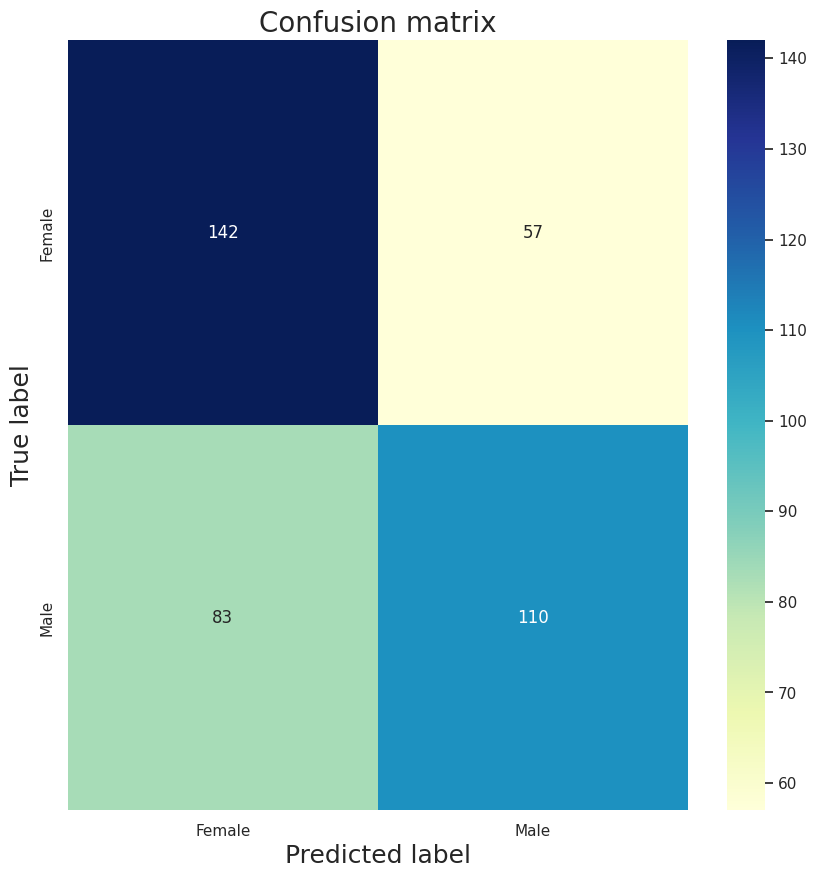

In [ ]:
#create CF
data = {'Actual': act_str,'Predicted' : pred_str}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act_str, pred_str)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

## MSE and MAE

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mae = mean_absolute_error(act_int,pred_int)
mse = mean_squared_error(act_int,pred_int)
rmse = mean_squared_error(act_int,pred_int,squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.3912100427307673
MSE: 0.2585857406342141
RMSE: 0.5085132649540365


# ROC

In [ ]:
pred_list

[0.8377686,
 0.074573115,
 0.77629226,
 0.10423173,
 0.8868112,
 0.03103595,
 0.11244513,
 0.12068028,
 0.5342539,
 0.027983392,
 0.048402805,
 0.30627927,
 0.008484677,
 0.044733092,
 0.13818316,
 0.01592975,
 0.31556806,
 0.49612862,
 0.21841061,
 0.2654791,
 0.7721119,
 0.1845858,
 0.15180966,
 0.02577845,
 0.79978186,
 0.17277423,
 0.021105036,
 0.8870362,
 0.46270537,
 0.27473602,
 0.447918,
 0.5072472,
 0.044238377,
 0.18781434,
 0.08633168,
 0.48462132,
 0.033927567,
 0.03896551,
 0.0728709,
 0.33366865,
 0.53502876,
 0.005207725,
 0.31401807,
 0.10854732,
 0.8845156,
 0.94672954,
 0.99059266,
 0.10164436,
 0.1909352,
 0.36829725,
 0.0023315428,
 0.40951583,
 0.12237562,
 0.48564032,
 0.038627233,
 0.02724261,
 0.17336063,
 0.37445745,
 0.67379797,
 0.054876037,
 0.012669983,
 0.29908174,
 0.17171043,
 0.12297438,
 0.63899404,
 0.1517154,
 0.061400745,
 0.01607349,
 0.0046997503,
 0.9077425,
 0.61858594,
 0.014910747,
 0.08617385,
 0.22555631,
 0.31132418,
 0.020909738,
 0.01507

In [ ]:
prob_list

[0.8377686,
 0.074573115,
 0.77629226,
 0.10423173,
 0.8868112,
 0.03103595,
 0.11244513,
 0.12068028,
 0.5342539,
 0.027983392,
 0.048402805,
 0.30627927,
 0.008484677,
 0.044733092,
 0.13818316,
 0.01592975,
 0.31556806,
 0.49612862,
 0.21841061,
 0.2654791,
 0.7721119,
 0.1845858,
 0.15180966,
 0.02577845,
 0.79978186,
 0.17277423,
 0.021105036,
 0.8870362,
 0.46270537,
 0.27473602,
 0.447918,
 0.5072472,
 0.044238377,
 0.18781434,
 0.08633168,
 0.48462132,
 0.033927567,
 0.03896551,
 0.0728709,
 0.33366865,
 0.53502876,
 0.005207725,
 0.31401807,
 0.10854732,
 0.8845156,
 0.94672954,
 0.99059266,
 0.10164436,
 0.1909352,
 0.36829725,
 0.0023315428,
 0.40951583,
 0.12237562,
 0.48564032,
 0.038627233,
 0.02724261,
 0.17336063,
 0.37445745,
 0.67379797,
 0.054876037,
 0.012669983,
 0.29908174,
 0.17171043,
 0.12297438,
 0.63899404,
 0.1517154,
 0.061400745,
 0.01607349,
 0.0046997503,
 0.9077425,
 0.61858594,
 0.014910747,
 0.08617385,
 0.22555631,
 0.31132418,
 0.020909738,
 0.01507

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, auc

In [ ]:
# Example: Replace these with your actual labels and predicted probabilities
actual_labels = test['Gender_Class'].tolist()
predicted_probabilities = prob_list

In [ ]:
fpr, tpr, thresholds = roc_curve(actual_labels, predicted_probabilities)
roc_auc = auc(fpr, tpr)

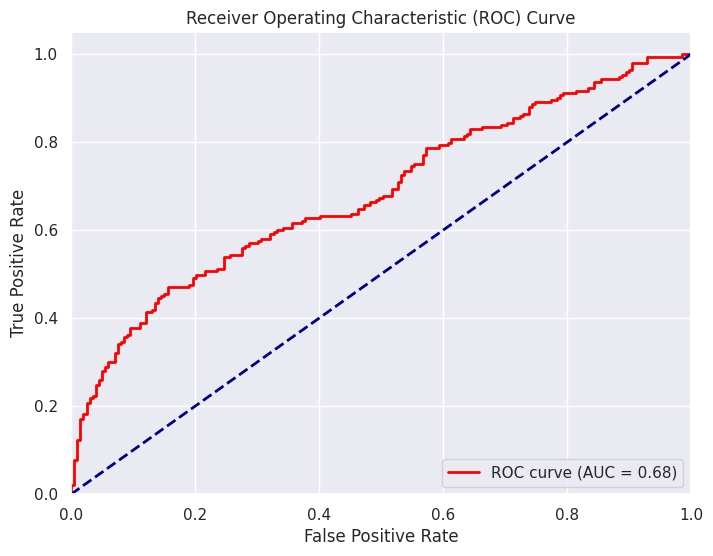

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# 7 year

In [ ]:
test

,Age(year),Gender,Folder_type,Folder_name,Path_Name,Filename,Gender_Class,Gender_Predict,Predict_float,Predict_str
0,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V69.jpg,0,Female,0.837769,Male
1,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV69.jpg,0,Female,0.074573,Female
2,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V70.jpg,0,Female,0.776292,Male
3,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV70.jpg,0,Female,0.104232,Female
4,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V74.jpg,0,Female,0.886811,Male
...,...,...,...,...,...,...,...,...,...,...
387,12,M,Abnormal,Lt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipOO101.jpg,1,Male,0.198933,Female
388,12,M,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,OO98.jpg,1,Male,0.100131,Female
389,14,F,Abnormal,Lt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipY95.jpg,0,Female,0.658422,Male
390,14,F,Abnormal,Lt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipY187.jpg,0,Female,0.995352,Male


In [ ]:
Y7 = test[test['Age(year)'] == 7]
Y7

,Age(year),Gender,Folder_type,Folder_name,Path_Name,Filename,Gender_Class,Gender_Predict,Predict_float,Predict_str
0,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V69.jpg,0,Female,0.837769,Male
1,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV69.jpg,0,Female,0.074573,Female
2,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V70.jpg,0,Female,0.776292,Male
3,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV70.jpg,0,Female,0.104232,Female
4,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V74.jpg,0,Female,0.886811,Male
5,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV74.jpg,0,Female,0.031036,Female
6,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V75.jpg,0,Female,0.112445,Female
7,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV75.jpg,0,Female,0.120680,Female
8,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V76.jpg,0,Female,0.534254,Male
9,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV76.jpg,0,Female,0.027983,Female


## confusion_matrix

In [ ]:
pred_str = np.array(Y7['Predict_str'].tolist()) #ทำนาย
act_str = np.array(Y7['Gender_Predict'].tolist()) # จริง

pred_int = np.array(Y7['Predict_float'].tolist())  #แทำนาย
act_int = np.array(Y7['Gender_Class'].tolist()) #ค่าจริง

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

# act = data_train['class'].array
# pred = data_train['category_ov'].array

cmat = confusion_matrix(act_str, pred_str)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act_str, pred_str))#performance

classifier accuracy = 50.0%
              precision    recall  f1-score   support

      Female       0.50      0.76      0.60        25
        Male       0.50      0.24      0.32        25

    accuracy                           0.50        50
   macro avg       0.50      0.50      0.46        50
weighted avg       0.50      0.50      0.46        50



Text(0.5, 76.24999999999999, 'Predicted label')

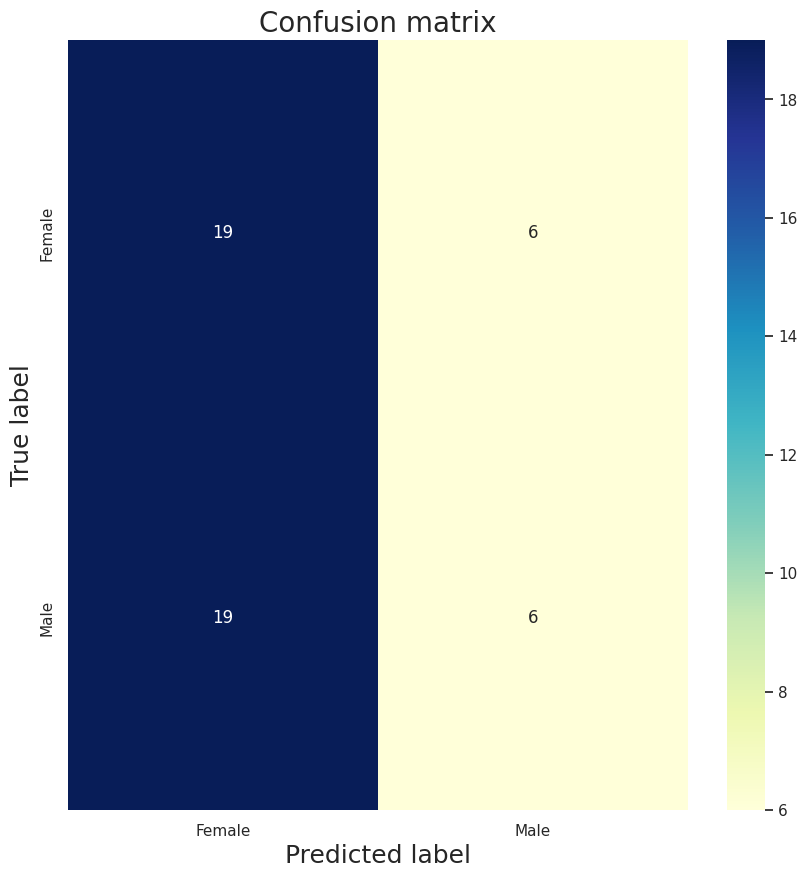

In [ ]:
#create CF
data = {'Actual': act_str,'Predicted' : pred_str}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act_str, pred_str)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

## MSE and MAE

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mae = mean_absolute_error(act_int,pred_int)
mse = mean_squared_error(act_int,pred_int)
rmse = mean_squared_error(act_int,pred_int,squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.4786862492375076
MSE: 0.3537968870466318
RMSE: 0.5948082775538953


# 8 year

In [ ]:
Y8 = test[test['Age(year)'] == 8]
Y8

,Age(year),Gender,Folder_type,Folder_name,Path_Name,Filename,Gender_Class,Gender_Predict,Predict_float,Predict_str
49,8,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,P70.jpg,0,Female,0.368297,Female
50,8,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipP70.jpg,0,Female,0.002332,Female
51,8,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,P72.jpg,0,Female,0.409516,Female
52,8,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipP72.jpg,0,Female,0.122376,Female
53,8,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,P74.jpg,0,Female,0.485640,Female
54,8,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipP74.jpg,0,Female,0.038627,Female
55,8,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,P75.jpg,0,Female,0.027243,Female
56,8,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipP75.jpg,0,Female,0.173361,Female
57,8,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,P76.jpg,0,Female,0.374457,Female
58,8,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipP76.jpg,0,Female,0.673798,Male


## confusion_matrix

In [ ]:
pred_str = np.array(Y8['Predict_str'].tolist()) #ทำนาย
act_str = np.array(Y8['Gender_Predict'].tolist()) # จริง

pred_int = np.array(Y8['Predict_float'].tolist())  #แทำนาย
act_int = np.array(Y8['Gender_Class'].tolist()) #ค่าจริง

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

# act = data_train['class'].array
# pred = data_train['category_ov'].array

cmat = confusion_matrix(act_str, pred_str)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act_str, pred_str))#performance

classifier accuracy = 64.58333333333333%
              precision    recall  f1-score   support

      Female       0.63      0.85      0.72        26
        Male       0.69      0.41      0.51        22

    accuracy                           0.65        48
   macro avg       0.66      0.63      0.62        48
weighted avg       0.66      0.65      0.63        48



Text(0.5, 76.24999999999999, 'Predicted label')

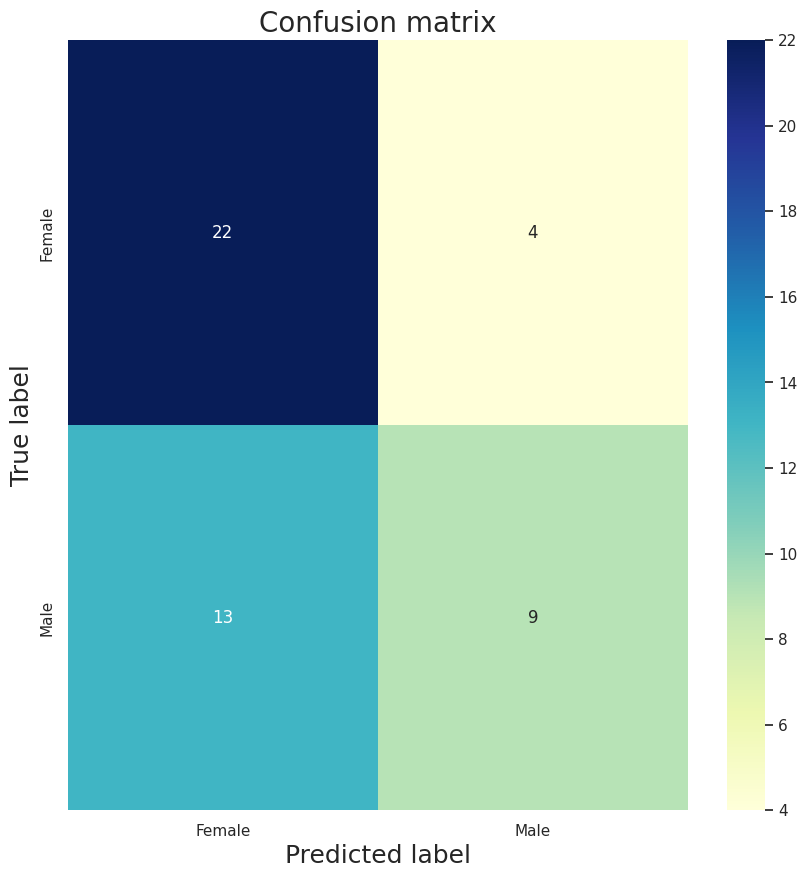

In [ ]:
#create CF
data = {'Actual': act_str,'Predicted' : pred_str}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act_str, pred_str)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

## MSE and MAE

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mae = mean_absolute_error(act_int,pred_int)
mse = mean_squared_error(act_int,pred_int)
rmse = mean_squared_error(act_int,pred_int,squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.39148797043405165
MSE: 0.27618029766255914
RMSE: 0.525528588815641


# 9 year

In [ ]:
Y9 = test[test['Age(year)'] == 9]
Y9

,Age(year),Gender,Folder_type,Folder_name,Path_Name,Filename,Gender_Class,Gender_Predict,Predict_float,Predict_str
94,9,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,W81.jpg,0,Female,0.013067,Female
95,9,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipW81.jpg,0,Female,0.101803,Female
96,9,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,W84.jpg,0,Female,0.234007,Female
97,9,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipW84.jpg,0,Female,0.031310,Female
98,9,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,W85.jpg,0,Female,0.318072,Female
99,9,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipW85.jpg,0,Female,0.723962,Male
100,9,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,W87.jpg,0,Female,0.320877,Female
101,9,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipW87.jpg,0,Female,0.185007,Female
102,9,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,W89.jpg,0,Female,0.040015,Female
103,9,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipW89.jpg,0,Female,0.073538,Female


## confusion_matrix

In [ ]:
pred_str = np.array(Y9['Predict_str'].tolist()) #ทำนาย
act_str = np.array(Y9['Gender_Predict'].tolist()) # จริง

pred_int = np.array(Y9['Predict_float'].tolist())  #แทำนาย
act_int = np.array(Y9['Gender_Class'].tolist()) #ค่าจริง

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

# act = data_train['class'].array
# pred = data_train['category_ov'].array

cmat = confusion_matrix(act_str, pred_str)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act_str, pred_str))#performance

classifier accuracy = 82.0%
              precision    recall  f1-score   support

      Female       0.77      0.92      0.84        26
        Male       0.89      0.71      0.79        24

    accuracy                           0.82        50
   macro avg       0.83      0.82      0.82        50
weighted avg       0.83      0.82      0.82        50



Text(0.5, 76.24999999999999, 'Predicted label')

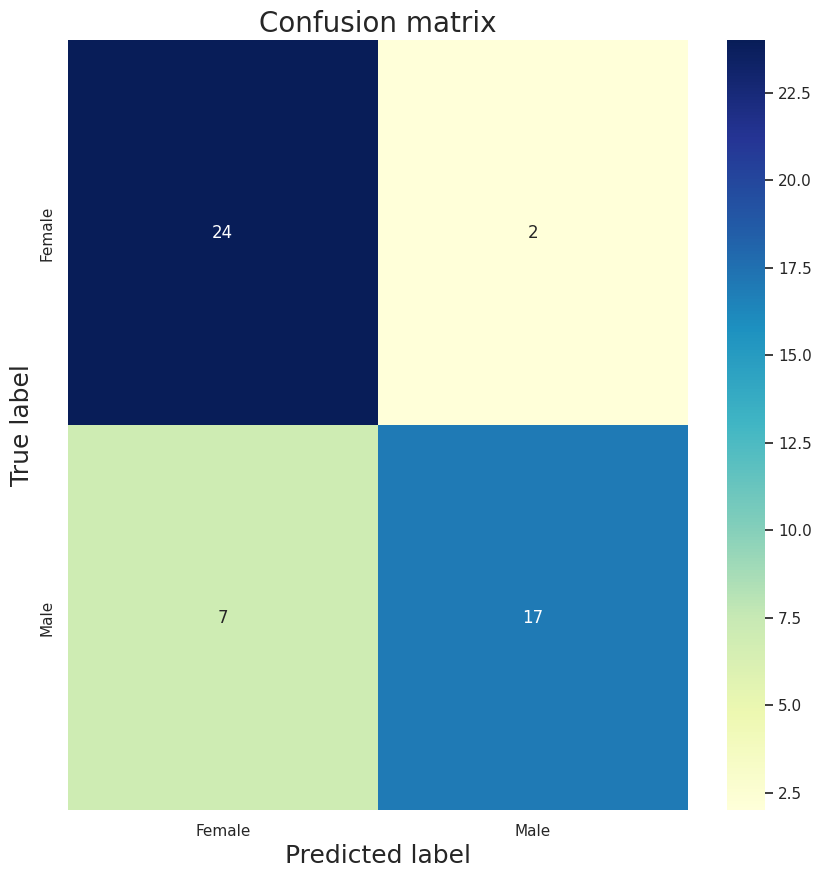

In [ ]:
#create CF
data = {'Actual': act_str,'Predicted' : pred_str}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act_str, pred_str)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

## MSE and MAE

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mae = mean_absolute_error(act_int,pred_int)
mse = mean_squared_error(act_int,pred_int)
rmse = mean_squared_error(act_int,pred_int,squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.27921855764463543
MSE: 0.1380992034829788
RMSE: 0.3716170118320457


# 10 year

In [ ]:
Y10 = test[test['Age(year)'] == 10]
Y10

,Age(year),Gender,Folder_type,Folder_name,Path_Name,Filename,Gender_Class,Gender_Predict,Predict_float,Predict_str
141,10,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,H79.jpg,0,Female,0.479584,Female
142,10,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipH79.jpg,0,Female,0.507615,Male
143,10,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,H81.jpg,0,Female,0.405541,Female
144,10,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipH81.jpg,0,Female,0.452126,Female
145,10,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,H82.jpg,0,Female,0.009848,Female
146,10,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipH82.jpg,0,Female,0.295085,Female
147,10,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,H83.jpg,0,Female,0.922015,Male
148,10,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipH83.jpg,0,Female,0.676248,Male
149,10,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,H84.jpg,0,Female,0.477880,Female
150,10,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipH84.jpg,0,Female,0.076961,Female


## confusion_matrix

In [ ]:
pred_str = np.array(Y10['Predict_str'].tolist()) #ทำนาย
act_str = np.array(Y10['Gender_Predict'].tolist()) # จริง

pred_int = np.array(Y10['Predict_float'].tolist())  #แทำนาย
act_int = np.array(Y10['Gender_Class'].tolist()) #ค่าจริง

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

# act = data_train['class'].array
# pred = data_train['category_ov'].array

cmat = confusion_matrix(act_str, pred_str)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act_str, pred_str))#performance

classifier accuracy = 61.224489795918366%
              precision    recall  f1-score   support

      Female       0.64      0.56      0.60        25
        Male       0.59      0.67      0.63        24

    accuracy                           0.61        49
   macro avg       0.61      0.61      0.61        49
weighted avg       0.61      0.61      0.61        49



Text(0.5, 76.24999999999999, 'Predicted label')

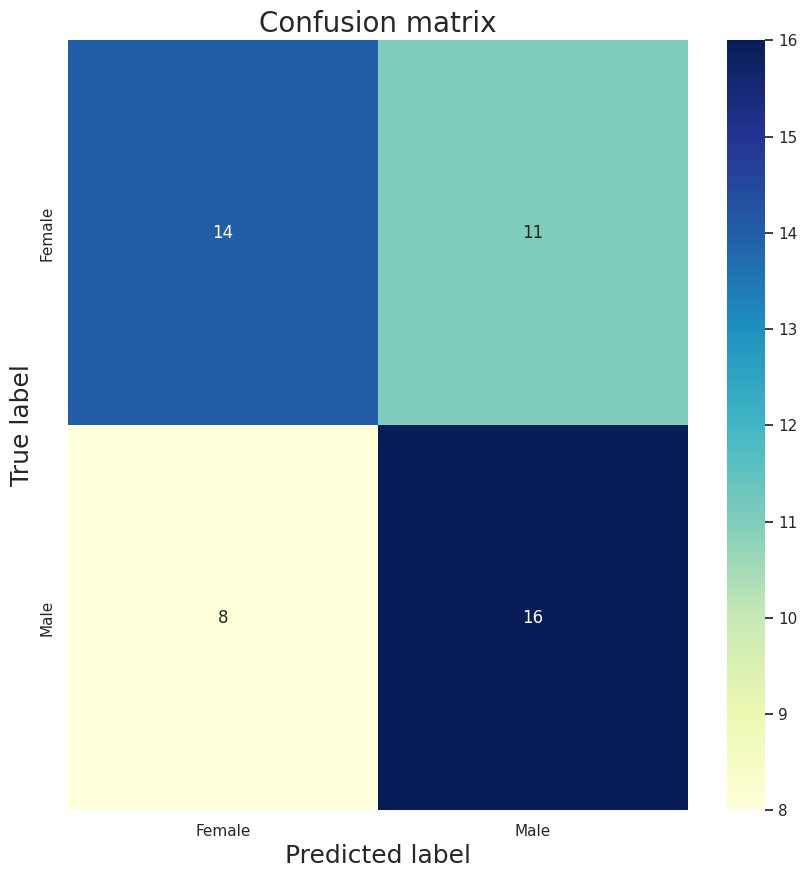

In [ ]:
#create CF
data = {'Actual': act_str,'Predicted' : pred_str}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act_str, pred_str)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

## MSE and MAE

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mae = mean_absolute_error(act_int,pred_int)
mse = mean_squared_error(act_int,pred_int)
rmse = mean_squared_error(act_int,pred_int,squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.4255534503799008
MSE: 0.2520911204105291
RMSE: 0.502086765818946


# 11 year

In [ ]:
Y11 = test[test['Age(year)'] == 11]
Y11

,Age(year),Gender,Folder_type,Folder_name,Path_Name,Filename,Gender_Class,Gender_Predict,Predict_float,Predict_str
188,11,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,D78.jpg,0,Female,0.795558,Male
189,11,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipD78.jpg,0,Female,0.050142,Female
190,11,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,D79.jpg,0,Female,0.418770,Female
191,11,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipD79.jpg,0,Female,0.289277,Female
192,11,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,D83.jpg,0,Female,0.421233,Female
193,11,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipD83.jpg,0,Female,0.567723,Male
194,11,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,D85.jpg,0,Female,0.123897,Female
195,11,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipD85.jpg,0,Female,0.010867,Female
196,11,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,D88.jpg,0,Female,0.318864,Female
197,11,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipD88.jpg,0,Female,0.056627,Female


## confusion_matrix

In [ ]:
pred_str = np.array(Y11['Predict_str'].tolist()) #ทำนาย
act_str = np.array(Y11['Gender_Predict'].tolist()) # จริง

pred_int = np.array(Y11['Predict_float'].tolist())  #แทำนาย
act_int = np.array(Y11['Gender_Class'].tolist()) #ค่าจริง

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

# act = data_train['class'].array
# pred = data_train['category_ov'].array

cmat = confusion_matrix(act_str, pred_str)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act_str, pred_str))#performance

classifier accuracy = 66.0%
              precision    recall  f1-score   support

      Female       0.65      0.62      0.64        24
        Male       0.67      0.69      0.68        26

    accuracy                           0.66        50
   macro avg       0.66      0.66      0.66        50
weighted avg       0.66      0.66      0.66        50



Text(0.5, 76.24999999999999, 'Predicted label')

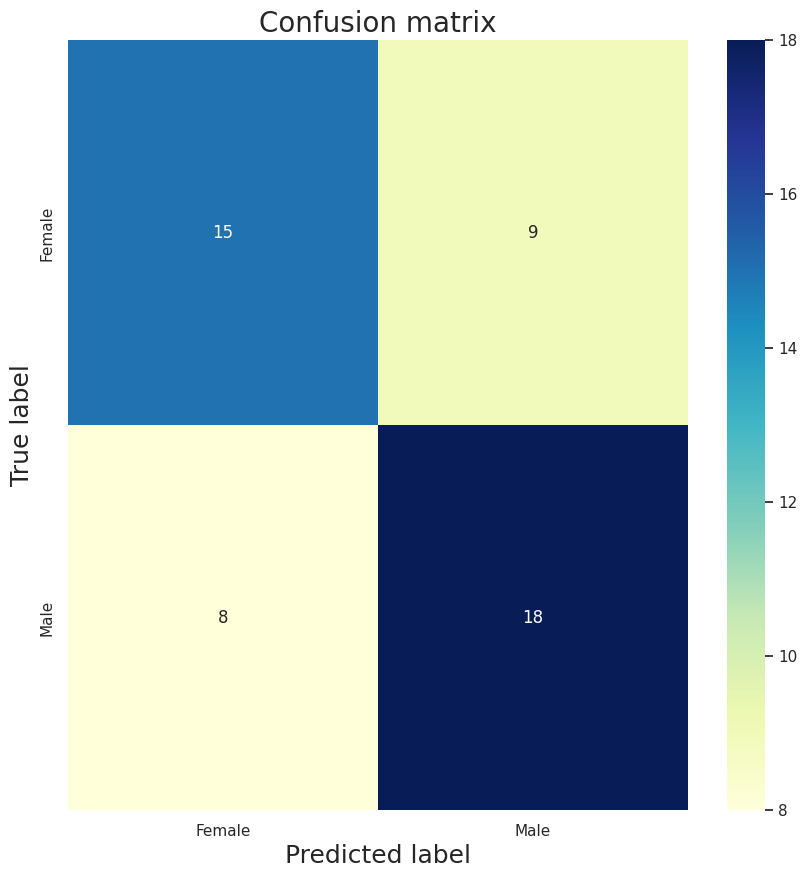

In [ ]:
#create CF
data = {'Actual': act_str,'Predicted' : pred_str}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act_str, pred_str)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

## MSE and MAE

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mae = mean_absolute_error(act_int,pred_int)
mse = mean_squared_error(act_int,pred_int)
rmse = mean_squared_error(act_int,pred_int,squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.37267674433067444
MSE: 0.25348404054484214
RMSE: 0.5034719858590367


# 12 year

In [ ]:
Y12 = test[test['Age(year)'] == 12]
Y12

,Age(year),Gender,Folder_type,Folder_name,Path_Name,Filename,Gender_Class,Gender_Predict,Predict_float,Predict_str
237,12,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,O85.jpg,0,Female,0.825542,Male
238,12,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipO85.jpg,0,Female,0.966193,Male
239,12,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,O89.jpg,0,Female,0.881384,Male
240,12,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipO89.jpg,0,Female,0.929448,Male
241,12,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,O90.jpg,0,Female,0.045051,Female
242,12,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipO90.jpg,0,Female,0.409041,Female
243,12,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,O93.jpg,0,Female,0.101804,Female
244,12,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipO93.jpg,0,Female,0.003234,Female
245,12,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,O94.jpg,0,Female,0.635590,Male
246,12,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipO94.jpg,0,Female,0.620476,Male


## confusion_matrix

In [ ]:
pred_str = np.array(Y12['Predict_str'].tolist()) #ทำนาย
act_str = np.array(Y12['Gender_Predict'].tolist()) # จริง

pred_int = np.array(Y12['Predict_float'].tolist())  #แทำนาย
act_int = np.array(Y12['Gender_Class'].tolist()) #ค่าจริง

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

# act = data_train['class'].array
# pred = data_train['category_ov'].array

cmat = confusion_matrix(act_str, pred_str)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act_str, pred_str))#performance

classifier accuracy = 54.166666666666664%
              precision    recall  f1-score   support

      Female       0.52      0.48      0.50        23
        Male       0.56      0.60      0.58        25

    accuracy                           0.54        48
   macro avg       0.54      0.54      0.54        48
weighted avg       0.54      0.54      0.54        48



Text(0.5, 76.24999999999999, 'Predicted label')

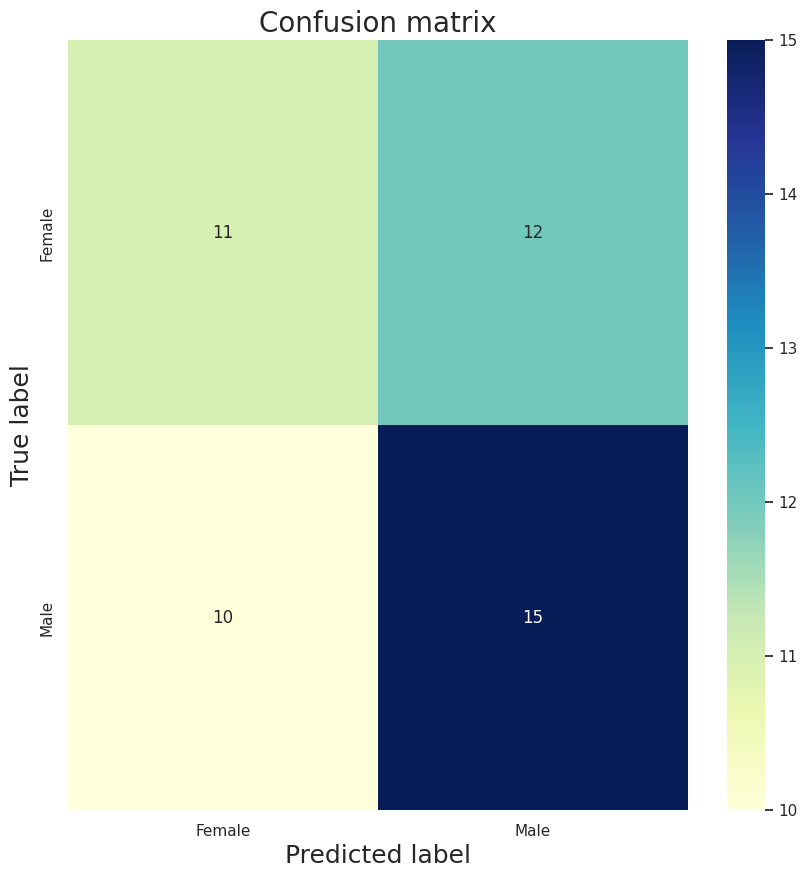

In [ ]:
#create CF
data = {'Actual': act_str,'Predicted' : pred_str}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act_str, pred_str)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

## MSE and MAE

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mae = mean_absolute_error(act_int,pred_int)
mse = mean_squared_error(act_int,pred_int)
rmse = mean_squared_error(act_int,pred_int,squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.43829140412951045
MSE: 0.31882548630478386
RMSE: 0.5646463373694934


# 13 year

In [ ]:
Y13 = test[test['Age(year)'] == 13]
Y13

,Age(year),Gender,Folder_type,Folder_name,Path_Name,Filename,Gender_Class,Gender_Predict,Predict_float,Predict_str
281,13,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,G84.jpg,0,Female,0.013192,Female
282,13,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipG84.jpg,0,Female,0.019298,Female
283,13,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,G92.jpg,0,Female,0.359312,Female
284,13,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipG92.jpg,0,Female,0.121947,Female
285,13,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,G93.jpg,0,Female,0.184068,Female
286,13,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipG93.jpg,0,Female,0.037110,Female
287,13,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,G94.jpg,0,Female,0.023085,Female
288,13,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipG94.jpg,0,Female,0.393421,Female
289,13,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,G98.jpg,0,Female,0.873329,Male
290,13,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipG98.jpg,0,Female,0.855739,Male


## confusion_matrix

In [ ]:
pred_str = np.array(Y13['Predict_str'].tolist()) #ทำนาย
act_str = np.array(Y13['Gender_Predict'].tolist()) # จริง

pred_int = np.array(Y13['Predict_float'].tolist())  #แทำนาย
act_int = np.array(Y13['Gender_Class'].tolist()) #ค่าจริง

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

# act = data_train['class'].array
# pred = data_train['category_ov'].array

cmat = confusion_matrix(act_str, pred_str)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act_str, pred_str))#performance

classifier accuracy = 72.0%
              precision    recall  f1-score   support

      Female       0.72      0.72      0.72        25
        Male       0.72      0.72      0.72        25

    accuracy                           0.72        50
   macro avg       0.72      0.72      0.72        50
weighted avg       0.72      0.72      0.72        50



Text(0.5, 76.24999999999999, 'Predicted label')

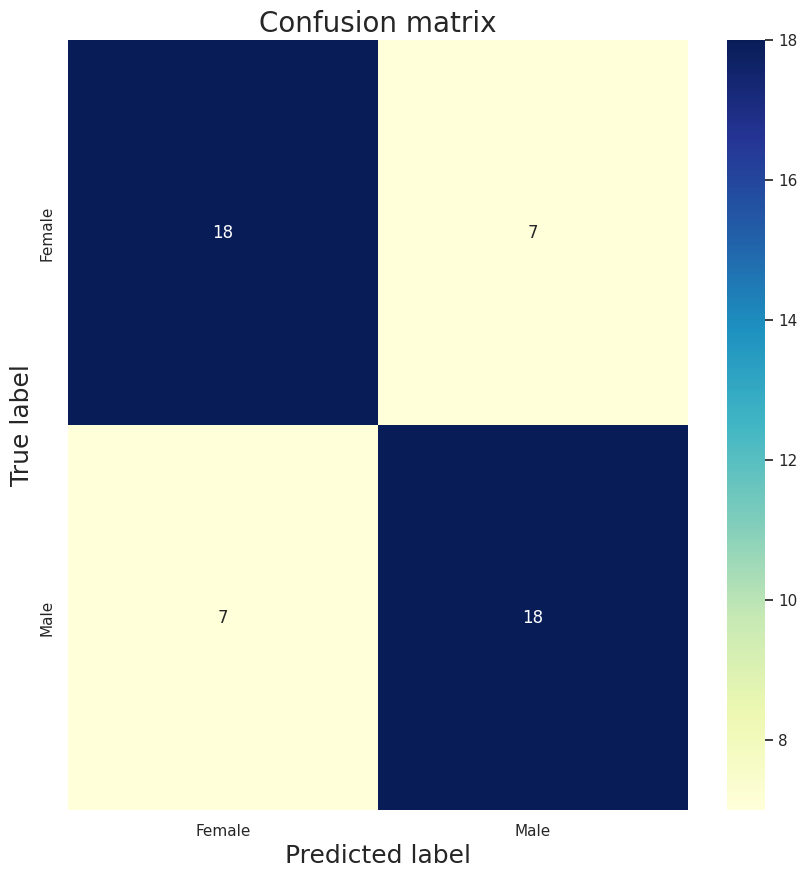

In [ ]:
#create CF
data = {'Actual': act_str,'Predicted' : pred_str}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act_str, pred_str)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

## MSE and MAE

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mae = mean_absolute_error(act_int,pred_int)
mse = mean_squared_error(act_int,pred_int)
rmse = mean_squared_error(act_int,pred_int,squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.3252209857851267
MSE: 0.20228152022129087
RMSE: 0.4497571791770431


# 14 year

In [ ]:
Y14 = test[test['Age(year)'] == 14]
Y14

,Age(year),Gender,Folder_type,Folder_name,Path_Name,Filename,Gender_Class,Gender_Predict,Predict_float,Predict_str
331,14,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,Y96.jpg,0,Female,0.185376,Female
332,14,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipY96.jpg,0,Female,0.449137,Female
333,14,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,Y98.jpg,0,Female,0.126432,Female
334,14,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipY98.jpg,0,Female,0.013401,Female
335,14,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,Y99.jpg,0,Female,0.074518,Female
336,14,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipY99.jpg,0,Female,0.475310,Female
337,14,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,Y101.jpg,0,Female,0.489676,Female
338,14,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipY101.jpg,0,Female,0.426187,Female
339,14,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,Y104.jpg,0,Female,0.342543,Female
340,14,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipY104.jpg,0,Female,0.412318,Female


## confusion_matrix

In [ ]:
pred_str = np.array(Y14['Predict_str'].tolist()) #ทำนาย
act_str = np.array(Y14['Gender_Predict'].tolist()) # จริง

pred_int = np.array(Y14['Predict_float'].tolist())  #แทำนาย
act_int = np.array(Y14['Gender_Class'].tolist()) #ค่าจริง

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

# act = data_train['class'].array
# pred = data_train['category_ov'].array

cmat = confusion_matrix(act_str, pred_str)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act_str, pred_str))#performance

classifier accuracy = 63.829787234042556%
              precision    recall  f1-score   support

      Female       0.63      0.76      0.69        25
        Male       0.65      0.50      0.56        22

    accuracy                           0.64        47
   macro avg       0.64      0.63      0.63        47
weighted avg       0.64      0.64      0.63        47



Text(0.5, 76.24999999999999, 'Predicted label')

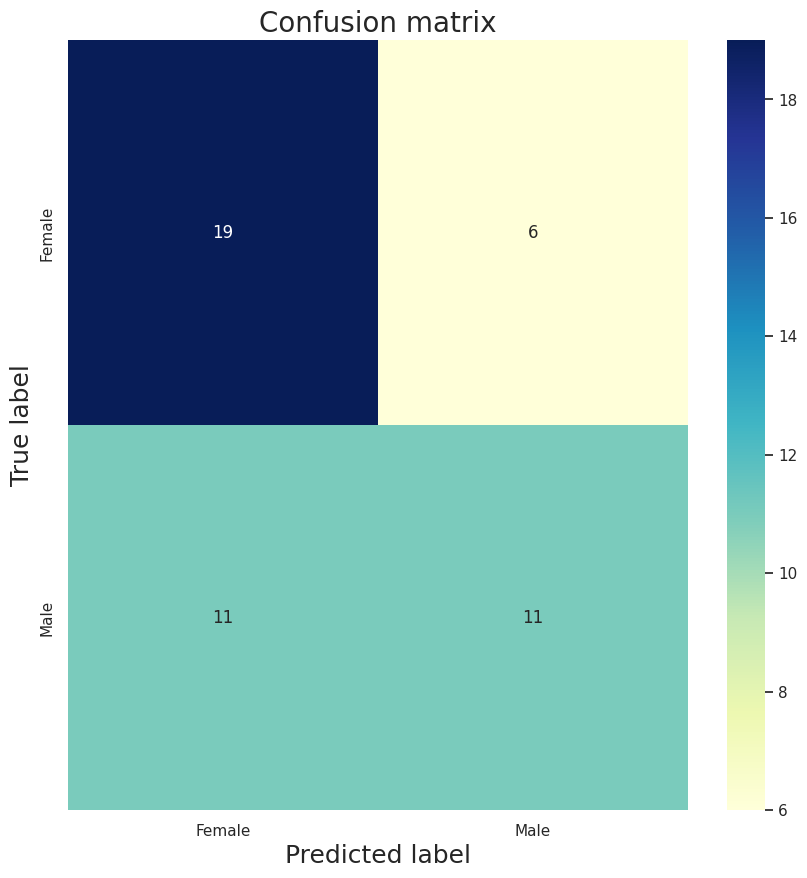

In [ ]:
#create CF
data = {'Actual': act_str,'Predicted' : pred_str}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act_str, pred_str)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

## MSE and MAE

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mae = mean_absolute_error(act_int,pred_int)
mse = mean_squared_error(act_int,pred_int)
rmse = mean_squared_error(act_int,pred_int,squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.42303576282760563
MSE: 0.2780805368782202
RMSE: 0.5273334209759706
